# Imported Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
sns.set_style("darkgrid")

## Loading data

In [2]:
food_data=pd.read_csv('indian_food.csv')

In [3]:
food_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


# EDA

In [4]:
food_data.shape

(255, 9)

<p>This dataset has 255 rows and it gives detailed information about food name, ingredients,diet,rep_time,cook_time,flavor_profile,course,state and region in INDIA</p>

In [5]:
food_data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [6]:
food_data.dropna(inplace=True)

In [7]:
food_data.describe()

,prep_time,cook_time
count,254.000000,254.000000
mean,31.188976,34.566929
std,72.685497,48.357217
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


<P>In this dataset, many data are presented as -1.</P>

### Column wise treating -1 value

In [8]:
food_data.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

##### (*) Numerical column

In [9]:
food_data[food_data['prep_time']==-1].count()

name              30
ingredients       30
diet              30
prep_time         30
cook_time         30
flavor_profile    30
course            30
state             30
region            30
dtype: int64

In [10]:
food_data['prep_time']=food_data.prep_time.replace(-1,food_data['prep_time'].mean())

In [11]:
food_data[food_data['cook_time']==-1].count()

name              28
ingredients       28
diet              28
prep_time         28
cook_time         28
flavor_profile    28
course            28
state             28
region            28
dtype: int64

In [12]:
food_data['cook_time']=food_data.prep_time.replace(-1,food_data['cook_time'].mean())

##### (*) Categorical column

In [13]:
food_data[food_data['region']=='-1'].count()

name              13
ingredients       13
diet              13
prep_time         13
cook_time         13
flavor_profile    13
course            13
state             13
region            13
dtype: int64

In [14]:
food_data['region']=food_data.region.replace('-1',None)

In [15]:
food_data[food_data['state']=='-1'].count()

name              24
ingredients       24
diet              24
prep_time         24
cook_time         24
flavor_profile    24
course            24
state             24
region            24
dtype: int64

In [16]:
food_data['state']=food_data.state.replace('-1',None)

In [17]:
food_data[food_data['flavor_profile']=='-1'].count()

name              29
ingredients       29
diet              29
prep_time         29
cook_time         29
flavor_profile    29
course            29
state             29
region            29
dtype: int64

In [18]:
food_data['flavor_profile']=food_data.flavor_profile.replace('-1',None)

###### Adding columns for better understanding

In [19]:
c=0
def split_ingredients(col):
    c=col.split(',')
    return c

In [20]:
l=[]
for i in food_data['ingredients']:
    s=0
    for j in split_ingredients(i):
        s+=1
    l.append(s)
food_data['ingredients_count']=l

In [21]:
food_data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,ingredients_count
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,45.0,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,80.0,sweet,dessert,Rajasthan,West,3
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,15.0,sweet,dessert,Punjab,North,6
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,15.0,sweet,dessert,Rajasthan,West,10
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,15.0,sweet,dessert,West Bengal,East,8


# Data Distribution

### Univarient Analysis

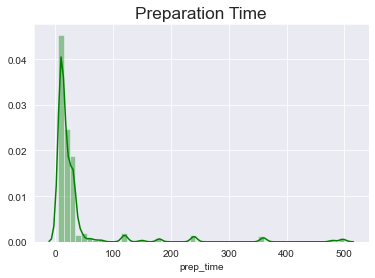

In [22]:
sns.distplot(food_data['prep_time'],color='green');
plt.title("Preparation Time",fontsize='xx-large');

<p>Preparation column data is right skewed </p>

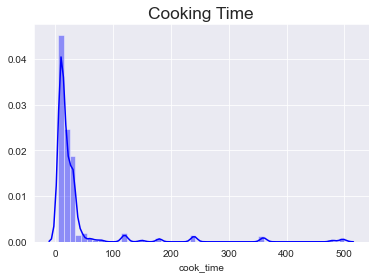

In [23]:
sns.distplot(food_data['cook_time'],color='blue');
plt.title("Cooking Time",fontsize='xx-large');

<p>Cooking Time data is right skewed </p>

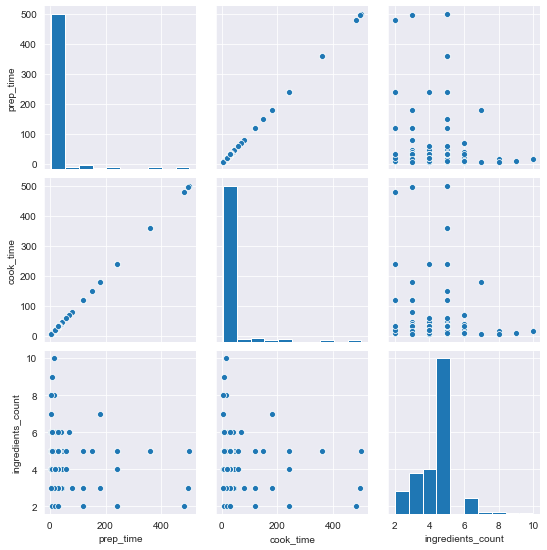

In [24]:
sns.pairplot(food_data);

### Bivarient Analysis

In [25]:
food_data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region', 'ingredients_count'],
      dtype='object')

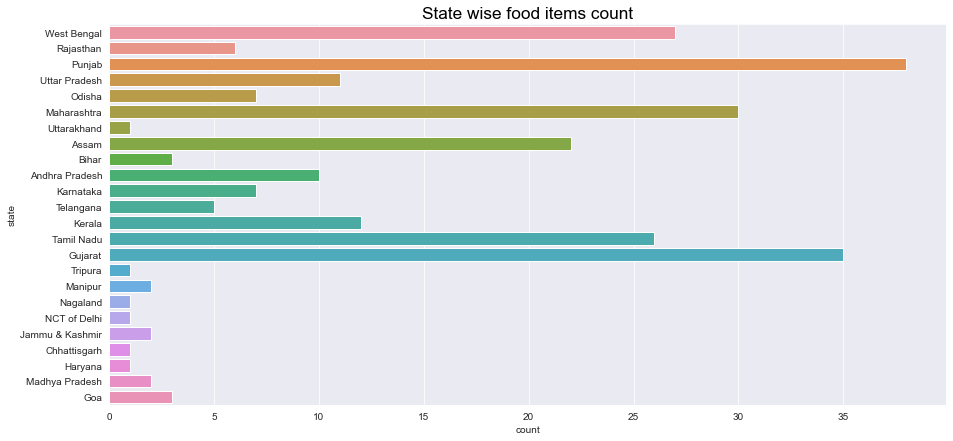

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(y=food_data['state']);
plt.title("State wise food items count",color='black',fontsize='xx-large');

Compared to other states, Punjab has high number of food items.

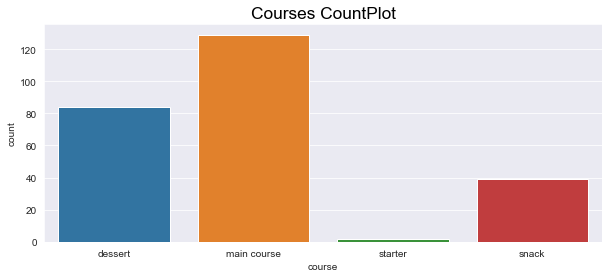

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(food_data['course']);
plt.title("Courses CountPlot",color='black',fontsize='xx-large');

This data covers mostly main course dishes. 

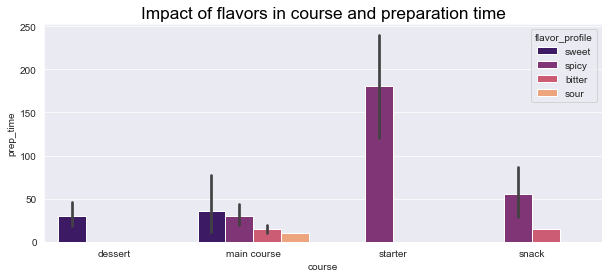

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(food_data['course'],food_data['prep_time'],hue=food_data['flavor_profile'],palette='magma');
plt.title("Impact of flavors in course and preparation time",color='black',fontsize='xx-large');

Comparatively the spicy starters are famous in many states and it take more time to prepare also.

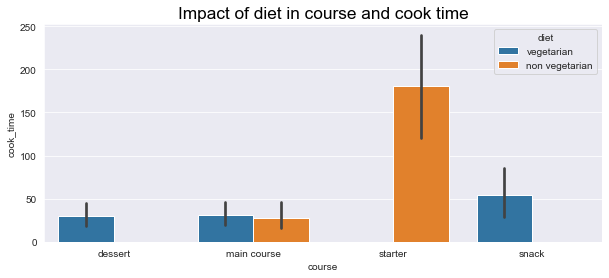

In [29]:
plt.figure(figsize=(10,4))
sns.barplot(food_data['course'],food_data['cook_time'],hue=food_data['diet']);
plt.title("Impact of diet in course and cook time",color='black',fontsize='xx-large');

Non-vegetarian diets are preferred in many states and it takes more time to cook also. 

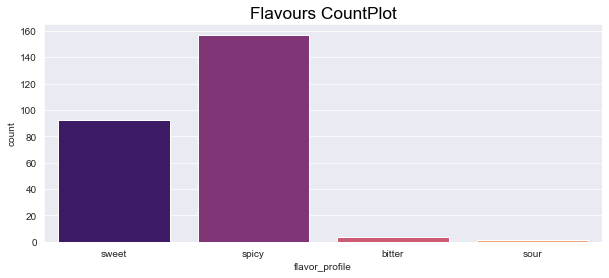

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(food_data['flavor_profile'],palette='magma');
plt.title("Flavours CountPlot",color='black',fontsize='xx-large');

##### PIE CHARTS

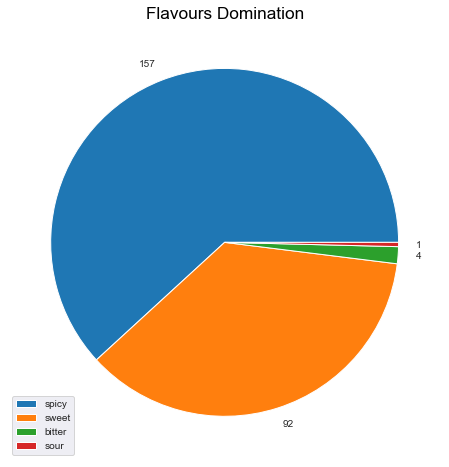

In [31]:
plt.figure(figsize=(15,8))
plt.title("Flavours Domination",color='black',fontsize='xx-large');
plt.pie(food_data['flavor_profile'].value_counts().reset_index()['flavor_profile'],labels=food_data['flavor_profile'].value_counts().reset_index()['flavor_profile'], explode=None, colors=None, autopct=None, shadow=False);
plt.legend(food_data['flavor_profile'].value_counts().reset_index()['index'],loc="best");

It seems across all states, people are very fond of Spicy & Sweets foods than sour and bitter. 

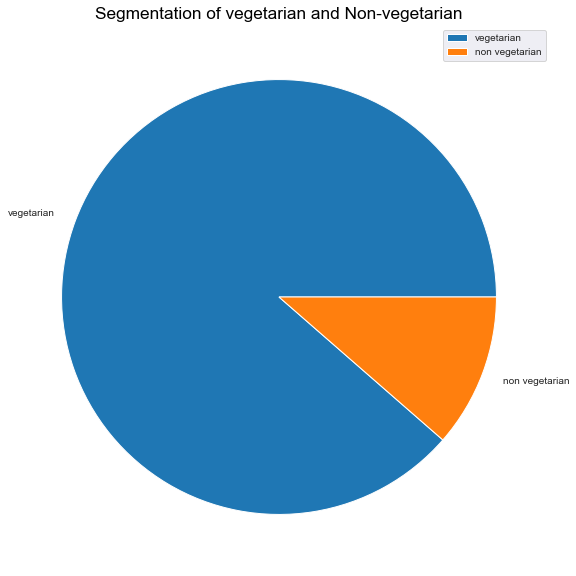

In [32]:
plt.figure(figsize=(20,10))
plt.title("Segmentation of vegetarian and Non-vegetarian",color='black',fontsize='xx-large');
plt.pie(food_data['diet'].value_counts().reset_index()['diet'],labels=food_data['diet'].value_counts().reset_index()['index'], explode=None, colors=None, autopct=None, shadow=False);
plt.legend(food_data['diet'].value_counts().reset_index()['index'],loc="best");

People are most common to vegetarian diet than non-vegetarian.

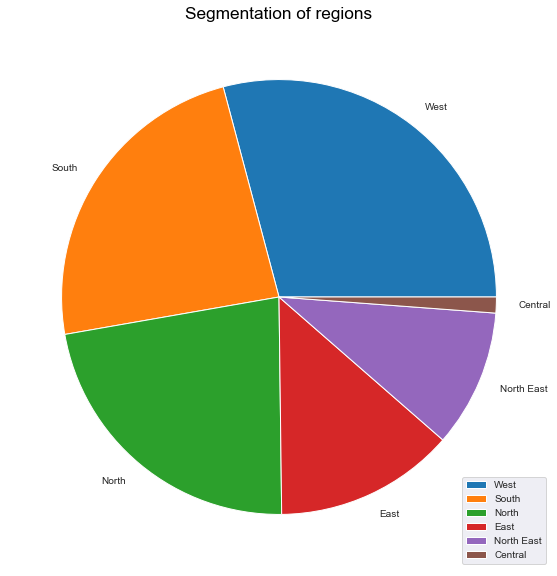

In [33]:
plt.figure(figsize=(20,10))
plt.title("Segmentation of regions",color='black',fontsize='xx-large');
plt.pie(food_data['region'].value_counts().reset_index()['region'],labels=food_data['region'].value_counts().reset_index()['index'], explode=None, colors=None, autopct=None, shadow=False);
plt.legend(food_data['region'].value_counts().reset_index()['index'],loc="best");

#####  Total ingredients used all over states

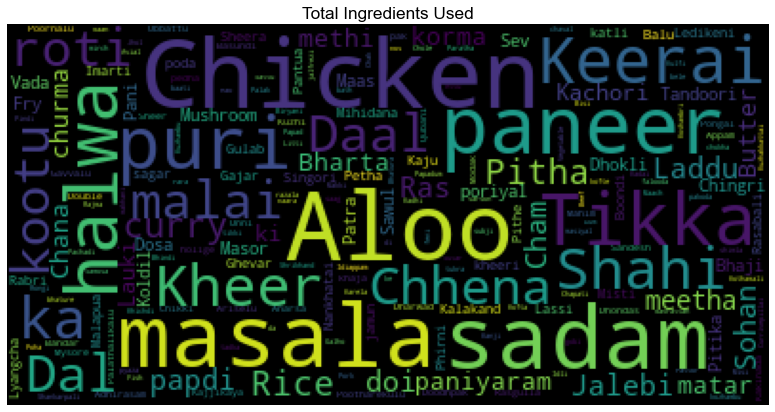

In [34]:
wordCloud = WordCloud(background_color='black',max_font_size = 50).generate(' '.join(food_data['name']))
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title('Total Ingredients Used',color='black',fontsize='xx-large');
plt.imshow(wordCloud)
plt.show()

## Curious about Non-vegetarian & vegetarian ingredients

In [35]:
food_data['diet'].value_counts()

vegetarian        225
non vegetarian     29
Name: diet, dtype: int64

In [36]:
veg=food_data.where(food_data['diet']=='vegetarian')
veg=veg.dropna()
veg.shape

(225, 10)

In [37]:
nonveg=food_data.where(food_data['diet']=='non vegetarian')
nonveg=nonveg.dropna()
nonveg.shape

(29, 10)

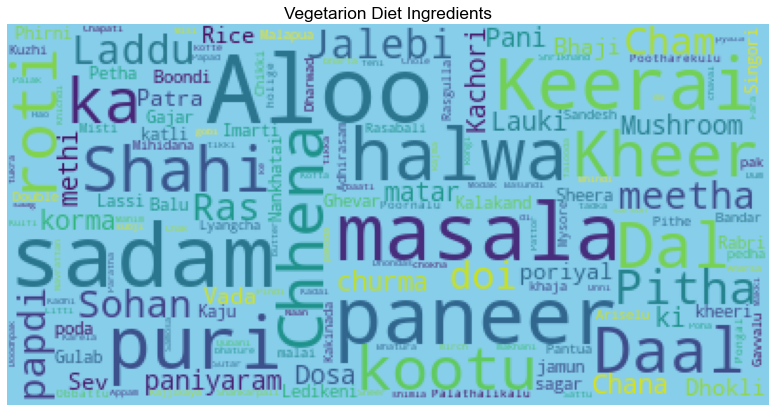

In [38]:
wordCloud = WordCloud(background_color='skyblue',max_font_size = 50).generate(' '.join(veg['name']))
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title('Vegetarion Diet Ingredients',color='black',fontsize='xx-large');
plt.imshow(wordCloud)
plt.show()

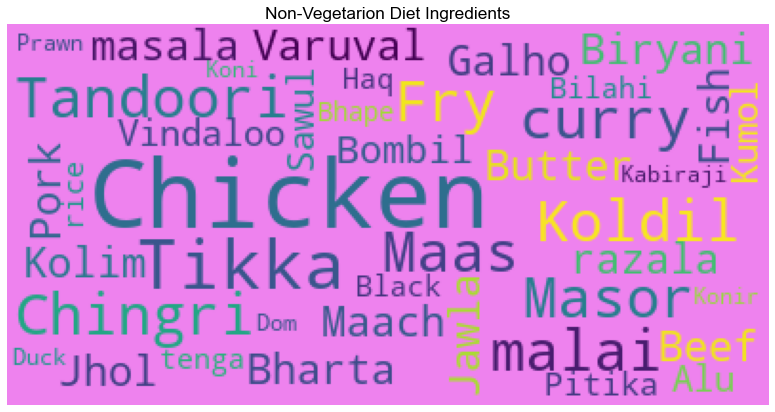

In [39]:
wordCloud = WordCloud(background_color='violet',max_font_size = 50).generate(' '.join(nonveg['name']))
plt.figure(figsize=(20,7))
plt.axis('off')
plt.title('Non-Vegetarion Diet Ingredients',color='black',fontsize='xx-large');
plt.imshow(wordCloud)
plt.show()

### Ingredients state wise usuage

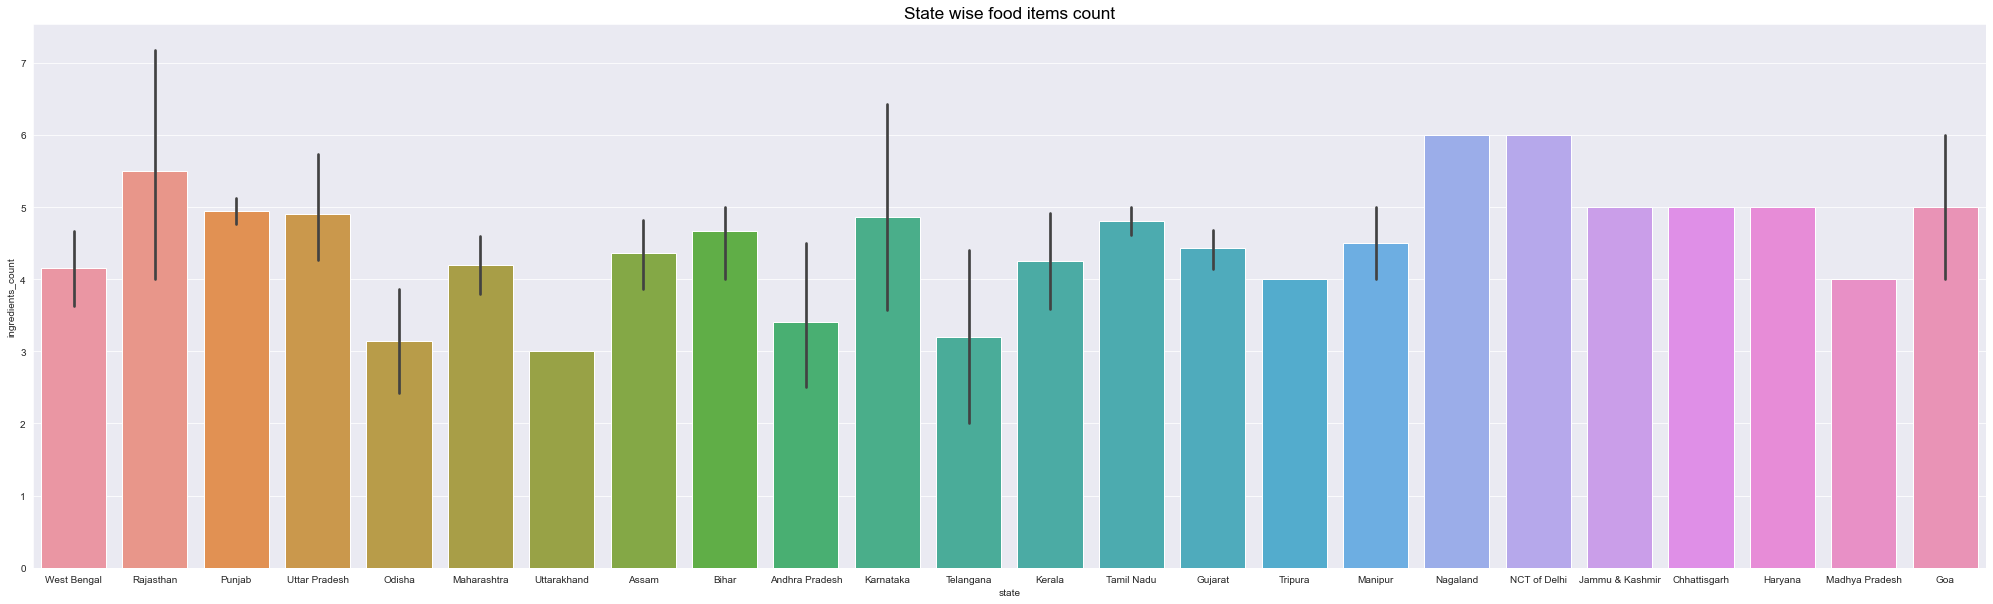

In [40]:
plt.figure(figsize=(35,10))
sns.barplot(x=food_data['state'],y=food_data['ingredients_count']);
plt.title("State wise food items count",color='black',fontsize='xx-large');

## Top 10 Ingredients

In [41]:
total_ingredients = pd.Series(food_data.ingredients.str.split(',').sum()).value_counts()

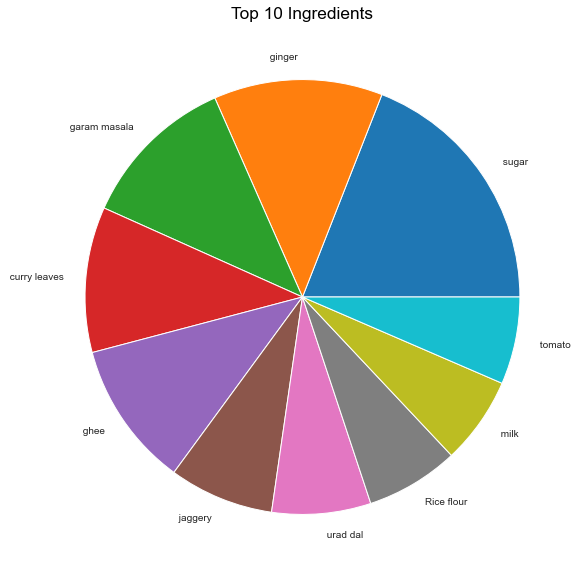

In [42]:
plt.figure(figsize=(20,10))
top_ingredients = total_ingredients[total_ingredients>12]
plt.title("Top 10 Ingredients",color='black',fontsize='xx-large');
plt.pie(top_ingredients.values,labels=top_ingredients.index, explode=None, colors=None, autopct=None, shadow=False);

## Food without these ingredients is not possible !

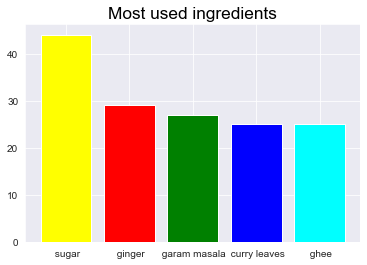

In [43]:
total_ingredients = total_ingredients[total_ingredients>22]
plt.title('Most used ingredients',color='black',fontsize='xx-large')
plt.bar(total_ingredients.index,total_ingredients.values,color=('Yellow', 'red', 'green', 'blue', 'cyan'));

### Conclusion

<p> All states dishes are not prepared without these top 5 ingrdients like sugar, ginger, grammasala, curry leaves, ghee <p>